In [117]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pprint

def hypothesis(X,w,b):
    h = np.dot(X,w)+b
    return sigmoid(h)

def sigmoid(z):
    return 1.0/(1.0+np.exp(-1.0*z))

def get_grad(y_true, X, w, b):
    grad_w = np.zeros(w.shape[0])
    grad_b = 0.0
    m = X.shape[0]
    
    for i in range(m):
        hx = hypothesis(X[i], w,b)
        grad_w += 1 * (y_true[i]-hx)*X[i]
        grad_b += 1*(y_true[i]-hx)
        
    grad_w /= m
    grad_b /= m
    return grad_w, grad_b


def error(y_true, X, w, b):
    m = X.shape[0]
    err = 0.0
    np.seterr(divide = 'ignore') 
    for i in range(m):
        hx = hypothesis(X[i], w, b)
#         print(hx)
        if hx != 0 :
            err += y_true[i] * np.log2(hx) + (1-y_true[i])*np.log2(1-hx)
        else:
            err +=(1-y_true[i])*np.log2(1-hx)
            
        

        
    return -err/m



In [120]:
def grad_descent(X, y_true, w, b, learning_rate = 0.1):
    
    err = error(y_true, X, w, b)
    grad_w, grad_b = get_grad(y_true, X, w, b)
    
    w = w + learning_rate * grad_w
    b = b + learning_rate * grad_b
    
    return err,w,b;

X = pd.read_csv('./Training Data/Train/Logistic_X_Train.csv')
# print(X)
X = X.to_numpy()
Y = pd.read_csv('./Training Data/Train/Logistic_Y_Train.csv')
# print(Y)
y_train = Y.to_numpy()

pprint.pprint(x_train)
x_train = X;


loss = []
# acc = []
w = 2*np.random.random((x_train.shape[1],))
print(x_train.shape[0])
b = 5*np.random.random()

for i in range(100):
    l,w,b = grad_descent(x_train, y_train, w, b, learning_rate = 0.1)
    loss.append(l)
    



array([[-1.23937466,  0.74910149, -0.52851491],
       [-1.03607028,  0.80143631, -1.28371152],
       [-0.61557914,  1.57952053, -1.39192706],
       ...,
       [ 0.08827657,  1.63878904, -2.19364056],
       [ 1.52515501,  0.85923429,  1.50530791],
       [-0.97981744,  0.56395376, -1.53939416]])
3000


[array([4.90296097]),
 array([4.73581688]),
 array([4.56991258]),
 array([4.40524435]),
 array([4.24181061]),
 array([4.07961271]),
 array([3.91865613]),
 array([3.75895201]),
 array([3.60051914]),
 array([3.44338647]),
 array([3.28759626]),
 array([3.13320787]),
 array([2.9803025]),
 array([2.828989]),
 array([2.67941126]),
 array([2.53175733]),
 array([2.38627076]),
 array([2.24326398]),
 array([2.10313327]),
 array([1.9663737]),
 array([1.83359104]),
 array([1.70550541]),
 array([1.58293898]),
 array([1.46677886]),
 array([1.35790862]),
 array([1.25711066]),
 array([1.16495656]),
 array([1.08171597]),
 array([1.00731574]),
 array([0.94136373]),
 array([0.88322529]),
 array([0.83212281]),
 array([0.78722872]),
 array([0.74773516]),
 array([0.71289659]),
 array([0.68205012]),
 array([0.65462056]),
 array([0.63011644]),
 array([0.60812174]),
 array([0.58828603]),
 array([0.5703147]),
 array([0.55396]),
 array([0.53901324]),
 array([0.52529813]),
 array([0.51266528]),
 array([0.50098759

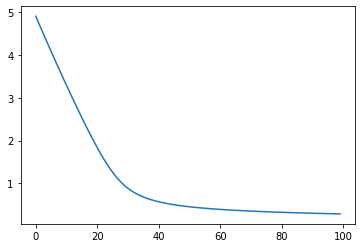

In [121]:
plt.plot(loss)
pprint.pprint(loss)

In [122]:
def predict(x,w,b):
    confidence = hypothesis(x,w,b)
    
    if confidence < 0.5:
        return 0
    return 1

In [125]:
X_test = pd.read_csv('./Test Cases/Test Cases/Logistic_X_Test.csv')

In [127]:
X_test = X_test.to_numpy()
print(X_test)

[[-0.76750773 -0.2618595  -2.51483147]
 [-1.24165258  1.44900144 -0.4130893 ]
 [ 1.92527007  1.93176097  1.34261917]
 ...
 [-1.18696873  0.94734729 -0.78638597]
 [-0.53232395  1.84516978 -0.9935503 ]
 [ 0.54023217  0.58099406  0.38664901]]


In [129]:
m = X_test.shape[0]
Y_out  = []
for i in range(m):
    ans = predict(X_test[i], w,b)
    Y_out.append(ans)
print(Y_out)
    

[1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 

In [139]:
y_ = np.array(Y_out)
print(y_)
df = pd.DataFrame(data = y_)
df.to_csv('chemical_ans.csv',index_label="label",index=False)

[1 1 0 1 1 1 0 1 0 0 0 1 1 1 1 0 1 0 1 1 1 0 1 0 1 1 1 0 0 1 1 1 1 0 0 0 1
 1 0 0 1 0 0 0 0 1 1 1 0 1 1 1 1 1 0 0 0 1 1 0 0 1 1 0 1 1 0 0 0 0 1 1 0 1
 1 1 0 1 1 1 0 0 1 1 1 0 1 1 1 0 0 1 1 0 0 1 1 1 1 0 1 0 1 1 0 1 0 1 1 0 0
 1 0 0 0 1 0 0 1 0 0 1 0 1 0 0 0 1 1 0 1 1 1 0 1 0 1 0 1 1 1 1 0 1 0 0 1 1
 1 0 1 1 1 1 0 1 0 0 0 0 0 0 1 0 1 0 0 1 1 1 1 1 1 1 1 1 1 0 1 0 0 1 1 1 0
 1 1 1 1 1 0 0 1 0 1 0 0 0 1 1 1 1 0 0 1 1 1 1 0 0 0 0 0 0 1 1 1 0 1 0 0 1
 1 1 1 0 1 1 0 0 1 0 0 1 0 1 1 0 1 1 1 0 0 0 0 0 0 1 1 1 0 1 1 0 1 0 1 1 0
 1 1 1 0 0 1 1 1 0 1 1 1 1 1 0 1 0 0 0 0 0 1 1 0 0 0 1 1 1 0 0 1 1 0 1 0 1
 1 1 0 1 1 0 1 1 0 1 1 1 1 0 0 1 0 1 1 0 0 1 1 1 1 1 0 1 1 0 0 0 1 0 1 1 0
 0 1 1 1 0 1 0 1 1 1 0 1 1 1 1 1 0 1 1 1 0 1 1 0 1 1 0 1 1 1 0 1 1 0 1 0 0
 1 1 1 1 1 1 0 1 0 0 0 1 1 1 1 1 1 0 1 1 0 1 0 1 0 0 1 0 0 1 0 0 1 0 1 1 0
 0 1 1 1 1 0 1 0 1 0 1 1 0 1 1 1 0 1 0 1 1 0 1 1 0 1 1 0 1 0 1 1 1 1 0 1 0
 0 0 1 0 0 0 0 1 1 1 1 0 1 1 0 0 1 1 1 1 0 1 1 0 1 1 1 1 1 1 1 1 0 1 1 1 0
 0 1 0 1 0 1 0 0 1 0 0 0 